<a href="https://colab.research.google.com/github/Poojitha20-B/Deep-Reinforcement-Learning-Internship/blob/main/Day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN, LSTM, GRU

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Embedding, TimeDistributed, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Fix random seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

# Input word
text = 'hello'
chars = sorted(set(text))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for c, i in char2idx.items()}
vocab_size = len(chars)


In [4]:
# Create input and output sequences: "hell" -> "ello"
X = [[char2idx[c] for c in text[:-1]]]
Y = [[char2idx[c] for c in text[1:]]]
X = np.array(X * 1000)  # repeat to create more samples
Y = np.array(Y * 1000)
Y_onehot = to_categorical(Y, num_classes=vocab_size)

# Number of training epochs
epochs = 100


In [5]:
# Function to build and train the model
def train_seq_model(model_type):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=4))

    if model_type == 'RNN':
        model.add(SimpleRNN(16, return_sequences=True))
    elif model_type == 'LSTM':
        model.add(LSTM(16, return_sequences=True))
    elif model_type == 'GRU':
        model.add(GRU(16, return_sequences=True))

    model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X, Y_onehot, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
    return model, history


In [6]:
# Train all 3 types
models = {}
histories = {}

for m in ['RNN', 'LSTM', 'GRU']:
    print(f"Training {m}...")
    model, history = train_seq_model(m)
    models[m] = model
    histories[m] = history

Training RNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training LSTM...
Training GRU...


In [7]:
## Final evaluation
print("\nFinal Accuracy & Loss:")
for m in models:
    loss, acc = models[m].evaluate(X, Y_onehot, verbose=0)
    print(f"{m}: Accuracy = {acc*100:.2f}%, Loss = {loss*100:.2f}%")


Final Accuracy & Loss:
RNN: Accuracy = 100.00%, Loss = 0.03%
LSTM: Accuracy = 100.00%, Loss = 0.05%
GRU: Accuracy = 100.00%, Loss = 0.03%


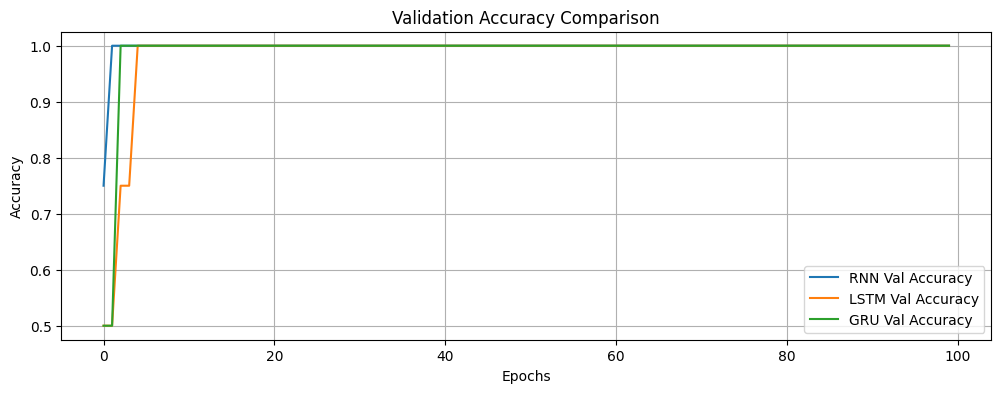

In [8]:
# Plot accuracy
plt.figure(figsize=(12, 4))
for m in histories:
    plt.plot(histories[m].history['val_accuracy'], label=f'{m} Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Observation

With 100 epochs, all models – RNN, LSTM and GRU – achieved 100% accuracy, meaning they learned the pattern completely. but when we look at the loss, GRU had the lowest (0.03%) while RNN and LSTM had slightly higher (0.04%). so even though accuracy is same, GRU is a bit more efficient and confident in its predictions, making it the best among the three in this case.